In [78]:
import numpy as np
import matplotlib.pyplot as plt

class RBF:
     
    def __init__(self, num_centers):
        self.num_centers = num_centers
        self.centers = None
        self.W = None
        self.hidden_shape = 3
         

    def function_rbf(self,d1, d2):
        return np.exp((-1 / 2)  * (d1-d2)**2)
    
    def calc_matrix(self, X):
        M = np.zeros((X.shape[0], self.num_centers), float)
        for c_n, c in enumerate(self.centers):
            for x_n, x in enumerate(X):
                M[x_n,c_n] = self.function_rbf(c, x)
        return M

    def define_centers(self, X):
        random_cent = np.random.choice(len(X), self.hidden_shape)
        centers = X[random_cent]
        return centers

    
    def fit(self, X, Y):
        self.centers = self.define_centers(X)

        M = self.calc_matrix(X)

        self.W = np.dot(np.linalg.pinv(M), Y)

    def predict(self, X):

        M = self.calc_matrix(X)
        Y = np.dot(M, self.W)
        return Y

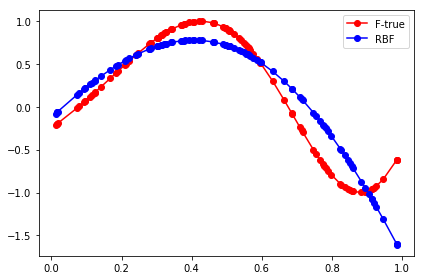

In [79]:
N = 100
X = np.random.uniform(0., 1., N)
X = np.sort(X, axis=0)
y =np.sin(3*(X+0.5)**2 - 1) 
 
rbf= RBF(3)
rbf.fit(X, y)
 
y_pred = rbf.predict(X)
 
plt.plot(X, y, '-o', label='F-true', color = 'red')
plt.plot(X, y_pred, '-o', label='RBF', color = 'blue')
plt.legend()
 
plt.tight_layout()
plt.show()